これまで訓練データを用いて予測モデルを作成し，テストデータや予測用データに予測モデルを適応させる「教師あり学習」について学習してきた。

この章では，予測ではなく解析のための「教師なし学習」について学習していく。

## 1. The Challenge of Unsupervised Learning

教師なし学習はよく「探索的データ分析」としてふるまう。

## 2. Principal Components Analysis（主成分分析）

主成分回帰は6.3.1章で紹介している。主成分回帰では予測子として主成分を使って回帰モデルに適応させる。

主成分分析では主成分を求める過程を言及する。

### 1. What Are Principal Components?

第一主成分を標準化された線形結合で示すと，次のようになる。
$$
Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + \dots + \phi_{p1}X_p \tag{10.1}
$$
第一主成分は最も分散が大きいものである。標準化することによって，$\sum_{j=1}^p\phi_{j1}^2=1$となる。この$\phi_1 = (\phi_{11}\ \phi_{21}\ \dots\ \phi_{p1})^T$は主成分固有ベクトルとなる。

第二主成分は第一主成分と無相関な成分であり，第二主成分の固有ベクトルは第一主成分の固有ベクトルに直交するようになる。変数が2つの場合は，第二主成分は第一主成分が決定すると同時に一意に決まる。

変数が2より多い場合，第二主成分は第一主成分の固有ベクトルに対して直交なベクトルを持つ，第一主成分以外で最も分散が大きい成分となる。

さらに，第三主成分は，第一・第二主成分のベクトルの双方と直交した固有ベクトルを持ち，第一・第二主成分以外で最も分散が大きい成分となる。

これをひたすら続けていき，変数の数の分だけ主成分と固有ベクトルを生成することができる。

### 2. Another Interpretation of Principal Components

主成分分析によって求める主成分得点，固有ベクトルから逆に元の値や近似値を求めることができる。
$$
x_{ij} = \sum_{m=1}^M z_{im}\phi_{jm} \tag{10.5}
$$

### 3. More on PCA

- 変数の標準化  
変数毎に単位が異なる場合がある。単位による影響を無くすために，主成分分析を行う前に標準化すると良い。

- 主成分の一意性  
固有ベクトルは符号を除いて一意に決まる。固有ベクトルと主成分得点から元の値を求めるとき，両方とも符号が反転していれば，最終的には符号が変化していても積は同じ符号になるので，符号の変化に注意が必要である。

- 分散の割合  
主成分分析における成分毎の寄与率は式（10.6）～（10.8）の手順を通して，（第m主成分の分散）/（全ての主成分の分散）によって決まる。
$$
\sum_{j=1}^pVar(X_j)=\sum_{j=1}^p \frac{1}{n}\sum_{i=1}^{n}x_{ij}^2 \tag{10.6}
$$
$$
\frac{1}{n}\sum_{i=1}^{n}z_{ij}^2 = \frac{1}{n}\sum_{i=1}^{n}(\sum_{j=1}^{p}\phi_{jm}x_{ij})^2 \tag{10.7} 
$$
$$
\frac{\sum_{i=1}^{n}(\sum_{j=1}^{p}\phi_{jm}x_{ij})^2}{\sum_{j=1}^p \sum_{i=1}^n x_{ij}^2} \tag{10.8}
$$

- どれだけの主成分を使用するか  
図10.4のスクリープロットがよく判断基準に使用される。例えば，寄与率が5%以上の主成分だけを用いる手段や，第一主成分から累積で90%までの主成分を用いる手段などがある。

### 4. Other Uses for Principal Components

主な傾向は寄与率が大きい数個の主成分で決まり，ノイズが小さくなることが多い。そのため，主成分分析は回帰，分類などの手法において主要成分だけを使用するための手段となる。


In [1]:
# Data
states = row.names(USArrests)
print(states)
print(names(USArrests))
print("mean")
print(apply(USArrests, 2, mean)) # 2はcolumn軸
print("var")
print(apply(USArrests, 2, var))

 [1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"       
[1] "Murder"   "Assault"  "UrbanPop" "Rape"    
[1] "mean"
  Murder  Assault UrbanPop

  Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232 
   Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385 
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432


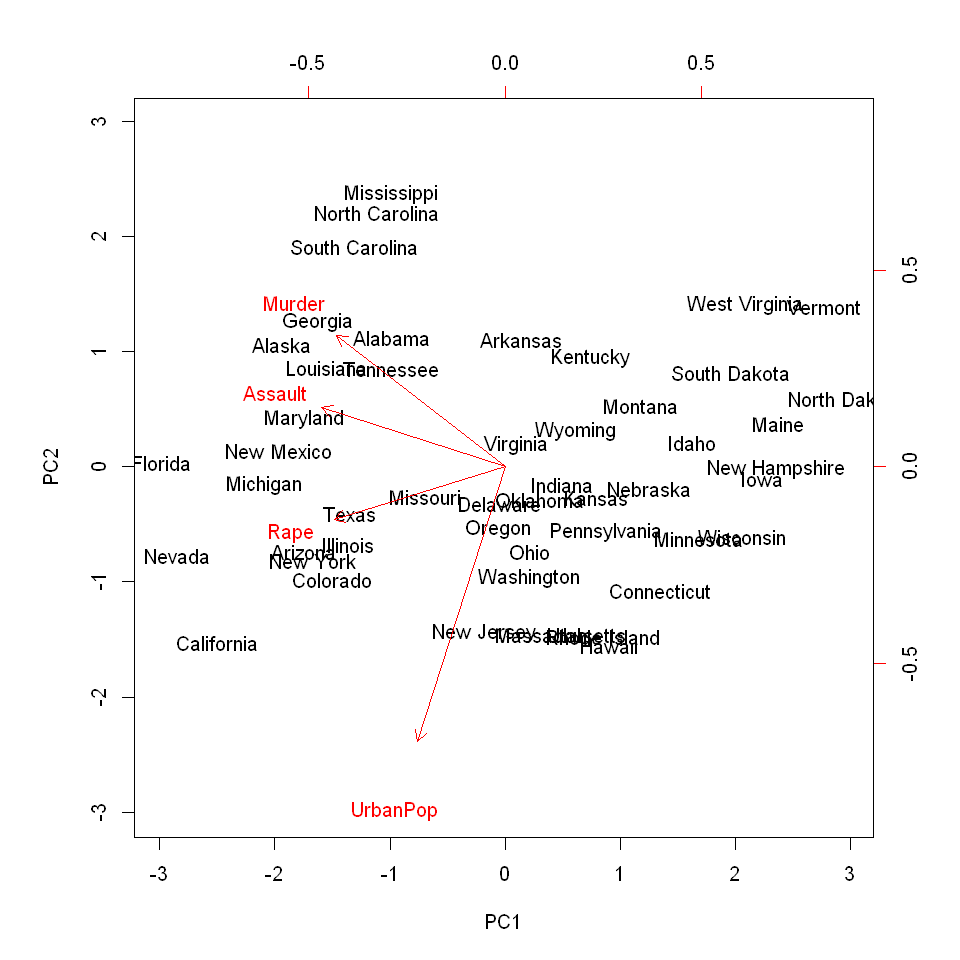

In [2]:
# PCA
pr_out = prcomp(USArrests, scale=TRUE)
print(pr_out$center)
print(pr_out$scale)
print(pr_out$rotation)
options(repr.plot.width=8, repr.plot.height=8) # jupyter用
biplot(pr_out, scale=0) # 図10.1と原点対象の図ができる

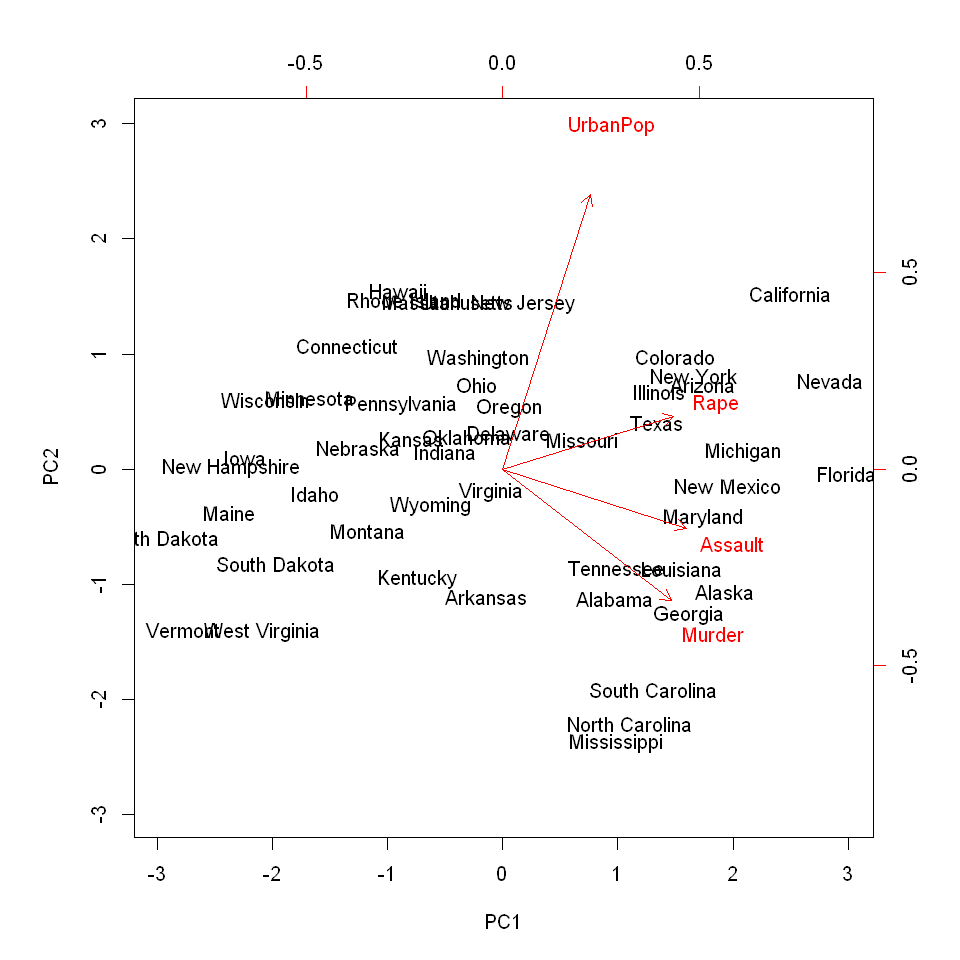

In [3]:
# Fig. 10.1
pr_out$rotation = -pr_out$rotation
pr_out$x = - pr_out$x
biplot(pr_out, scale=0)

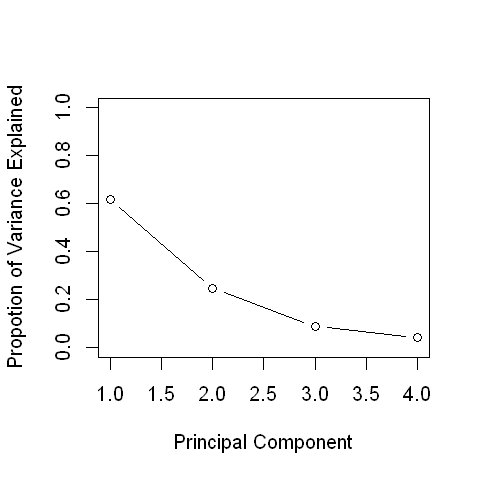

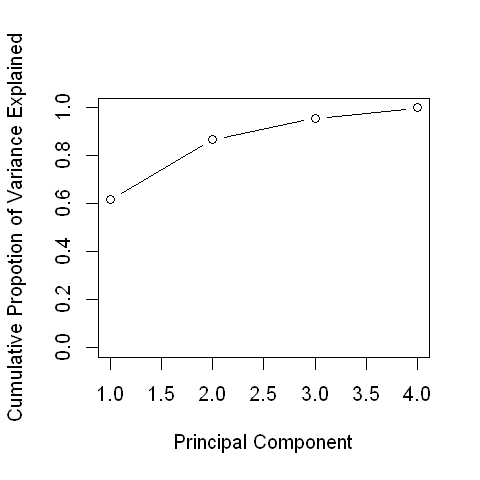

In [5]:
# 寄与率
pr_var = pr_out$sdev ^ 2
pve = pr_var / sum(pr_var)
options(repr.plot.width=4, repr.plot.height=4) # jupyter用
plot(pve, xlab="Principal Component", ylab="Propotion of Variance Explained", ylim=c(0, 1), type='b')
plot(cumsum(pve), xlab="Principal Component", ylab="Cumulative Propotion of Variance Explained", ylim=c(0, 1), type='b')